# Hands-On Machine Learning with Python
# Chapter 1 - The Machine Learning Landscape
# Example 1-1: Life Satisfaction

In [1]:
# Provides access to objects maintained by the Python interpreter e.g. command line arg lists
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Sklearn >= 0.20 is required 
import sklearn 
assert sklearn.__version__ >= "0.20"

Function that merges the OECD dataset's life satisfaction data with the IMF's GDP per capita data using (I think) a Python-based version of an inner join. 

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # Find all the measures in the OECD dataset where the relationship b/w qty and value is TOTAL
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    
    # Make a pivot table where all TOTAL qtys are grouped according to country
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    
    # In the GDP per capita column, rename the "2015" column to "GDP per capita" w/o returning a new df
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    
    # The Country column is the index for this new dataframe
    gdp_per_capita.set_index("Country", inplace=True)
    
    # Merge or Join based on Country name
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, 
                                 left_index=True, right_index=True)
    
    # Sort the values according to the GDP per capita (highest to lowest default?)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    
    # The countries we are not interested in plotting at the moment
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    
    # All the other countries
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    # Return the GDP per Capita and Life Satisfaction columns along with the Country names
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [8]:
# Store the filepath for the OECD and GDP CSV files
import os 
working_directory = os.getcwd()
datapath = os.path.join(working_directory, "lifesat", "")

In [10]:
# Configuring Jupyter to plot figures with matplotlib
import matplotlib as mpl 
%matplotlib inline 

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## Code Example: Loading and Plotting Data

In [11]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn.linear_model

In [14]:
# Load the data - kwargs for specifying delimiters, thousands separators, and missing values
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',') 
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', 
                            encoding='latin1', na_values='n/a')

In [15]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [16]:
# Extracting features and targets as numpy column stacks
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

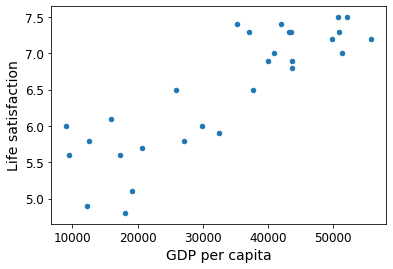

In [17]:
# Visualize the data using `pandas` built-in plotting functions
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')

In [19]:
# A function to save figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [44]:
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [21]:
# Make this notebook's output stable across runs by seeding the random number generator
np.random.seed(42)

## Load and Prepare Life Satisfaction Data

In [22]:
# Somewhat similar to the previous preprocessing operation, but this one confirms my earlier 
# assumption that the pivot table finds the total value for an indicator and groups them by country
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [23]:
# We're only concerned with the life satisfaction indicator
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

## Load and Prepare GDP per Capita data

In [24]:
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t', 
                            encoding='latin1', na_values='n/a')
gdp_per_capita.rename(columns={'2015':'GDP per capita'}, inplace=True)
gdp_per_capita.set_index('Country', inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


## Merging Datasets
- Actually sorts the data in ascending order by GDP, and not descending.
- Also, the `left_index=True` and `right_index=True` probably means the index is being used to match? 

In [27]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by='GDP per capita', inplace=True)
full_country_stats.head(3)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0


In [31]:
# Examining the GDP per capita and life satisfaction for US - loc means indexing based on index value, not number
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [32]:
# Remove indices: which countries are we initially removing from the scatter plot
remove_indices = [0, 1, 6, 8, 33, 34, 35]

# Create a list of 36 countries, and drop all countries in the remove_indices
keep_indices = list(set(range(36)) - set(remove_indices))

In [48]:
# Data for the initial set of countries
sample_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

# Data for the excluded countries
missing_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[remove_indices]

                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1


## Scatterplot to show linear trend

Saving figure:  money_happy_scatterplot


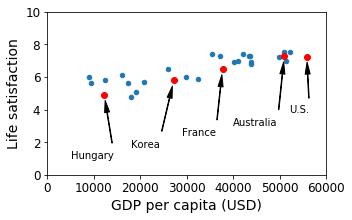

In [53]:
# Original scatterplot
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))

# Defining x and y axes limits for the scatterplot
plt.axis([0, 60000, 0, 10])

# Dictionary of country names and their coordinates in the scatterplot 
position_text = {
    'Hungary': (5000, 1),
    'Korea': (18000, 1.7), 
    'France': (29000, 2.4),
    'Australia': (40000, 3.0),
    'United States': (52000, 3.8)
}

# Custom markers for the new countries
for country, pos_text in position_text.items():
    # Tuple unpacking to get the coordinates for each country 
    pos_data_x, pos_data_y = sample_data.loc[country]
    
    # Smaller, custom annotation for the US
    country = 'U.S.' if country == 'United States' else country
    
    # Create arrows to the markers and add country names at the end
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, 
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    
    # Annotated countries are red dots
    plt.plot(pos_data_x, pos_data_y, 'ro')
    
plt.xlabel('GDP per capita (USD)')
save_fig('money_happy_scatterplot')
plt.show()

In [54]:
# Saving the joined dataset to a new CSV
sample_data.to_csv('lifesat.csv')

In [55]:
# Using the country names for red labels to get their GDPs and life satisfactions
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


## Manually Plotting Regression Models

Saving figure:  tweaking_model_params_plot


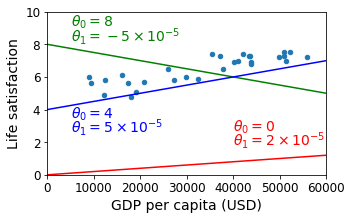

In [65]:
import numpy as np

sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))
plt.xlabel('GDP per capita (USD)')
plt.axis([0, 60000, 0, 10])

# Values of X for plotting straight lines - every 1k between 0 and 60k
X = np.linspace(0, 60000, 1000)

# Model 1: theta_0 = 0, theta_1 = 2 * 10-5
plt.plot(X, 2 * X / 100000, 'r')
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

# Model 2: theta_0 = 4, theta_1 = 5 * 10-5
plt.plot(X, 8 - 5 * X / 100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g" )
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

# Model 3: theta_0 = 8, theta_1 = -5 *10-5
plt.plot(X, 4 + 5 * X / 100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b" )
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

save_fig("tweaking_model_params_plot")

## `sklearn` Regression Model

In [67]:
from sklearn import linear_model

# Instantiate a linear regression model
lin_1 = linear_model.LinearRegression()

# Features: the GDP per capita
X_sample = np.c_[sample_data['GDP per capita']]

# Target: the Life Satisfaction
y_sample = np.c_[sample_data['Life satisfaction']]

# Optimise values of theta_0 and theta_1 to fit the training data
lin_1.fit(X_sample, y_sample)

# What are the values of the parameters?
# intercept = theta_0, coef[0][0] is theta_1
t_0, t_1 = lin_1.intercept_[0], lin_1.coef_[0][0]
t_0, t_1

(4.853052800266436, 4.911544589158484e-05)